# Getting Persine around YouTube's agreement screen

## ...and doing any other pre-flight work

First we'll open up a new Chrome window. We're going to use [webdriver-manager](https://github.com/SergeyPirogov/webdriver_manager) because it makes keeping up with Chrome/ChromeDriver versions much easier.

In [15]:
!pip install webdriver-manager

You should consider upgrading via the 'pip install --upgrade pip' command.


When we set up our browser, we need to pass it some options. One of these is `user-data-dir`, which is useful when you want to resume the same session later. If you don't want to resume the session later, remove that option.

In [27]:
# We'll save this under the 'example' profile
username = 'example'

default_options = [
    "--no-sandbox",
    "--disable-dev-shm-usage",
    "--disable-gpu",
    "--autoplay-policy=no-user-gesture-required",
    f"--user-data-dir=data/{username}"
]

options = webdriver.ChromeOptions()
for opt in default_options:
    options.add_argument(opt)

In [28]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# Send custom options to ChromeDriver
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [/Users/soma/.wdm/drivers/chromedriver/mac64/90.0.4430.24/chromedriver] found in cache


Now we need to use this window to visit YouTube and click the agreement button.

First, we'll send our browser to YouTube.

In [29]:
driver.get("https://www.youtube.com")

...but we get interrupted!

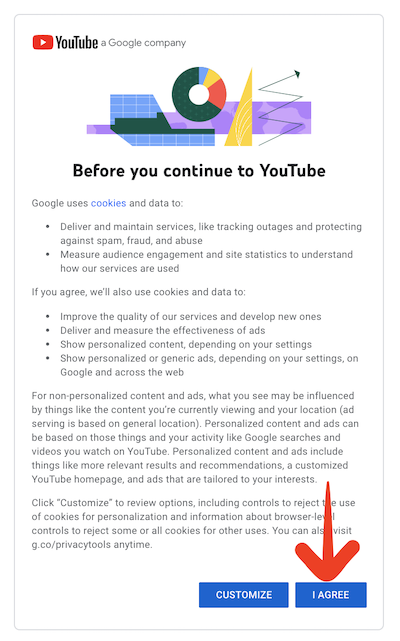

Let's manually click on the "I agree" button to continue.

In [30]:
driver.find_element_by_xpath('//*[text()="I agree"]').click()

Now we can use Persine as usual.

## Using Persine

The only difference between what we've done and what our is that we need to pass the driver to the PersonaEngine.

In [31]:
from persine import PersonaEngine

engine = PersonaEngine(headless=False, driver=driver)

In [32]:
with engine.persona() as persona:
    persona.run("https://www.youtube.com/watch?v=hZw23sWlyG0")

# Resuming later

Now let's say we're in another script or something and we want to try this again. Let's open up a new webdriver.

In [34]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# We'll save this under the 'example' profile
username = 'example'

default_options = [
    "--no-sandbox",
    "--disable-dev-shm-usage",
    "--disable-gpu",
    "--autoplay-policy=no-user-gesture-required",
    "--user-data-dir=data/{username}"
]

options = webdriver.ChromeOptions()
for opt in default_options:
    options.add_argument(opt)
    
# Send custom options to ChromeDriver
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [/Users/soma/.wdm/drivers/chromedriver/mac64/90.0.4430.24/chromedriver] found in cache


When we visit YouTube...

In [35]:
driver.get("https://www.youtube.com")

...no popup to click! So we can just use Persine like normal, **making sure to pass the `driver` in**.

In [37]:
from persine import PersonaEngine

engine = PersonaEngine(headless=False, driver=driver)

with engine.persona() as persona:
    persona.run("https://www.youtube.com/watch?v=hZw23sWlyG0")